In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib.pyplot as plt
import pickle as pkl

In [9]:
# generators - In Keras, which is a high-level neural networks API, you can use generators to efficiently load and preprocess data for training deep learning models. 
# Generators are helpful when you have a large dataset that cannot fit entirely into memory.

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/home/vedant/Sunbeam/Project/cat_v_dog_image_classification/cvd_website/source_code/dogs_vs_cats/train/',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

# labels_mode -> Cats will be 0 and Dogs will be one. So basically, every class will have a distinct integer to diffrentiate them.

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/home/vedant/Sunbeam/Project/cat_v_dog_image_classification/cvd_website/source_code/dogs_vs_cats/test/',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
# The above images are store in the form of numpy array with values ranging from 0 to 255.
# We need the values to be between 0 to 1. Thus, there is a need for normalization.

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Here, map function gets image and label for every record, passes it to the process() function where the normalize function takes place and the image and label is returned to the dataset.


In [11]:
# Create CNN model with 32-64-128 layers

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

# Softmax

# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


2023-06-04 10:46:39.351068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [20000]
	 [[{{node Placeholder/_4}}]]
2023-06-04 10:46:39.351387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [20000]
	 [[{{node Placeholder/_4}}]]


 75/625 [==>...........................] - ETA: 14:54 - loss: 5.9242 - accuracy: 0.5604

KeyboardInterrupt: 

In [1]:
# Save model using pickle
import pickle5 as pickle
file = open("c_v_d.pkl", 'wb')
pickle.dump(model, file)
file.close()

NameError: name 'model' is not defined

In [1]:
# Load Model
import pickle5 as pickle
with open("/home/vedant/Sunbeam/Project/cat_v_dog_image_classification/cvd_website/c_v_d.pkl", "rb") as file:
    model1 = pickle.load(file)

2023-06-06 17:51:02.696867: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 17:51:03.718992: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-06 17:51:05.100421: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-06 17:51:05.133155: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [2]:
import cv2


In [13]:
# Change the image here

test_img = cv2.imread('/home/vedant/Sunbeam/Project/cat_v_dog_image_classification/cvd_website/download_dog.jpeg')

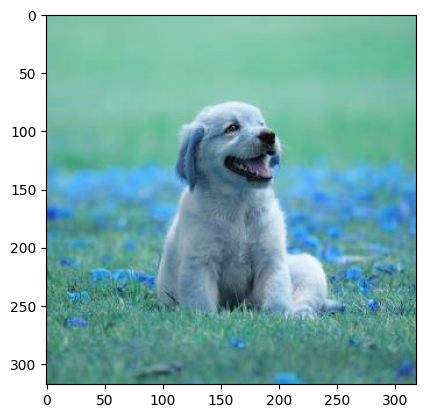

In [14]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [15]:
test_img.shape

(318, 318, 3)

In [16]:
# Resizes the image

test_img = cv2.resize(test_img,(256,256))

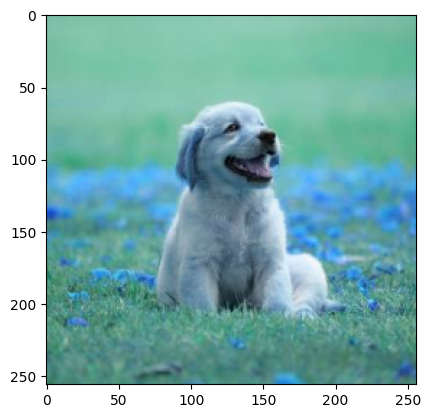

In [17]:
plt.imshow(test_img)

In [9]:
# converts into batch    ->?

test_input = test_img.reshape((1,256,256,3))

In [10]:
test_input.shape

(1, 256, 256, 3)

In [11]:
# Cat is 0 while Dog is 1

result = model1.predict(test_img)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(32, 256, 3)


In [20]:
type(result)

numpy.ndarray

In [19]:
result

array([[1.]], dtype=float32)